In [1]:
from pandas import read_csv
from seaborn import pairplot, heatmap
from matplotlib import pyplot as plt

In [2]:
data = read_csv("data/preprocessed_data.csv")

In [3]:
data.head(3)

,Unnamed: 0,trigger_ts_utc,measured_value,ns,machine,errection_location,installation_location,components,sensor_type
0,0,2024-10-31 01:14:50.846157+00:00,30944.000000,5,==0192E0020=C03DR3,NaN,NaN,NaN,DataPublishTrigger
1,1,2024-10-31 12:51:52.139911+00:00,0.004774,5,==0192E0020=C03DR3,++ST000,+AP002,-BF02,ConsumptionWater
2,2,2024-10-31 12:51:52.139911+00:00,3.647569,5,==0192E0020=C03DR3,++ST000,+AZ001,-BF01,ConsumptionWater


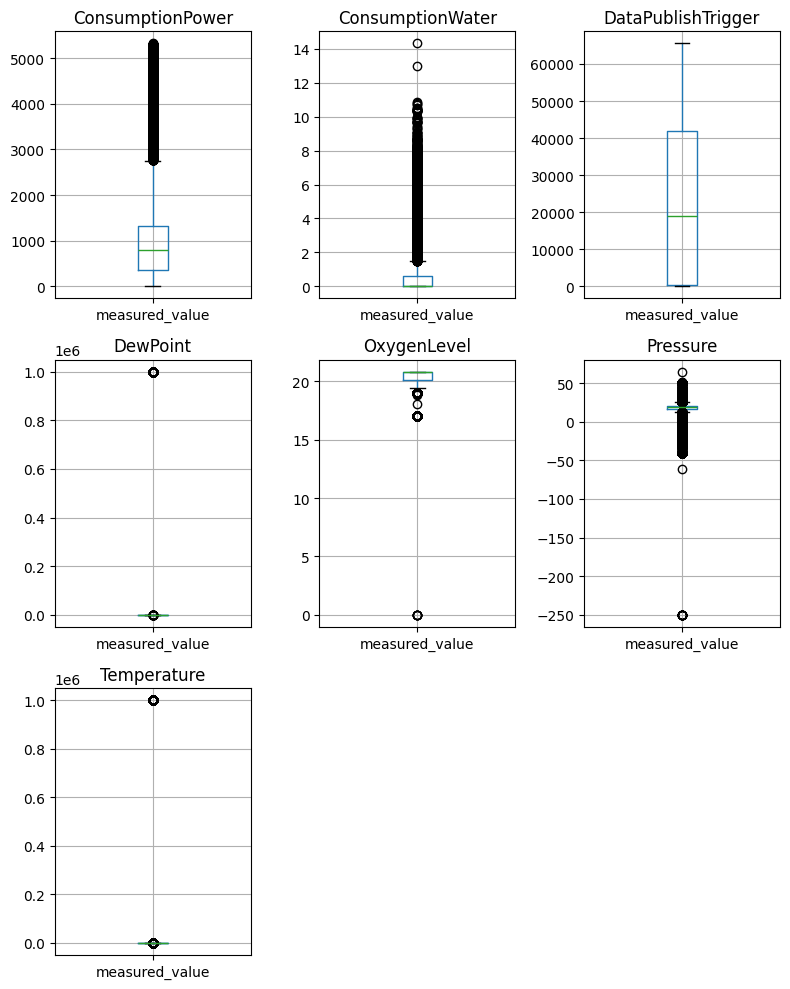

In [4]:
group = data.groupby("sensor_type")
group.boxplot(figsize=(8, 10), column="measured_value", sharey=False, subplots=True)
plt.tight_layout()
plt.show()

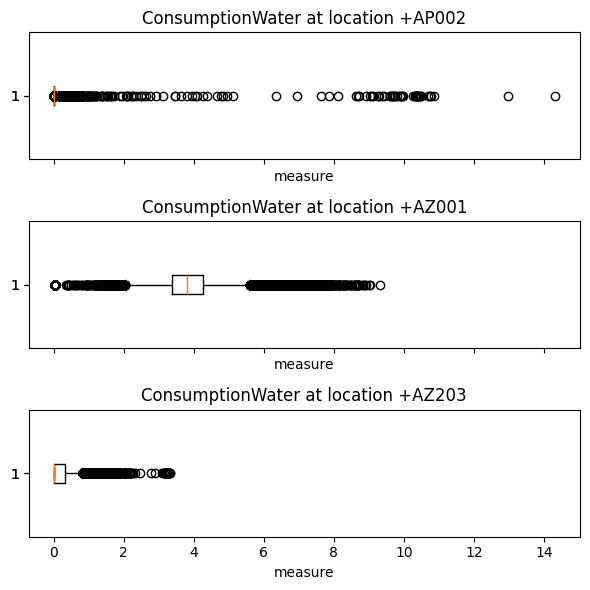

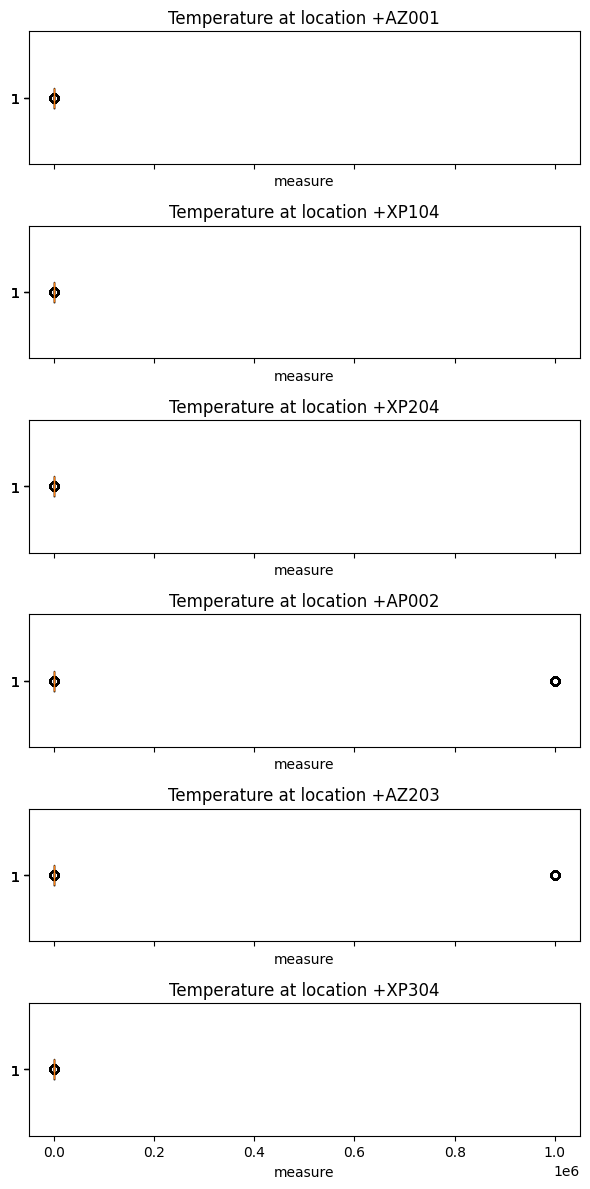

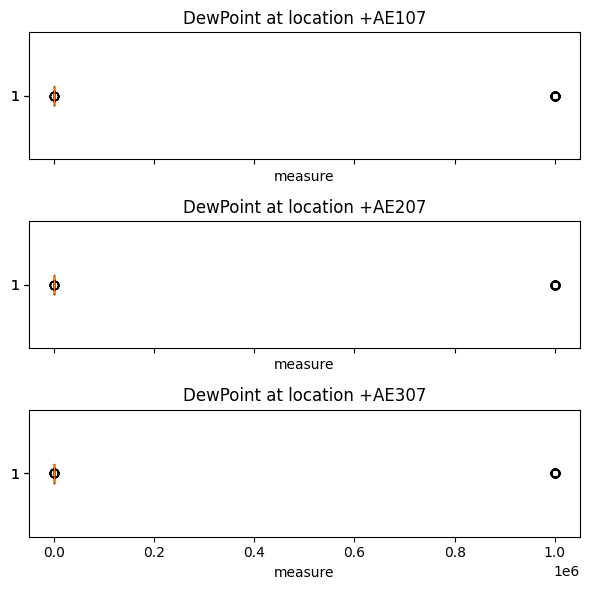

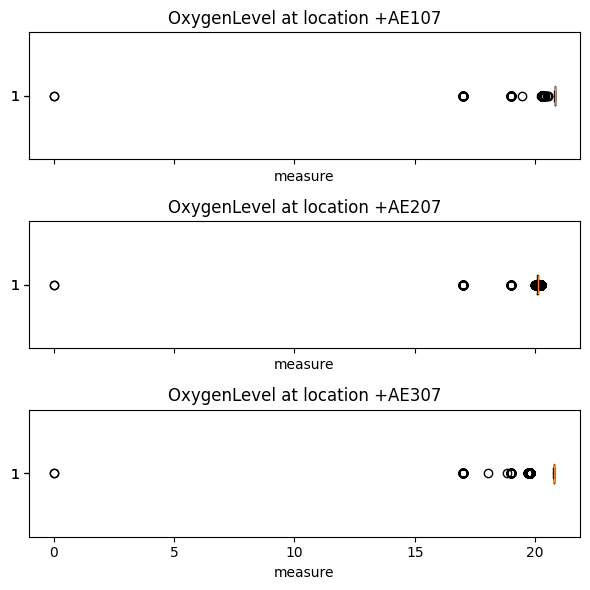

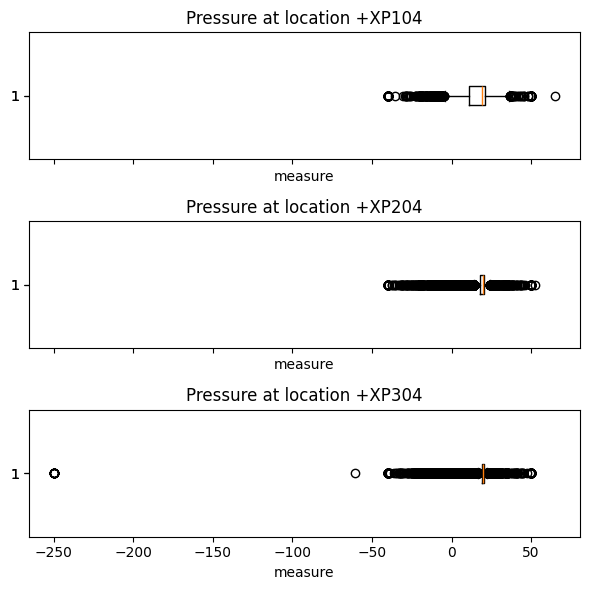

In [5]:
for channel in data.sensor_type.unique():
    _data = data.loc[data.sensor_type==channel]
    n = len(_data["installation_location"].unique())
    if n > 1:
        i = 0
        fig, ax = plt.subplots(ncols=1, nrows=n, figsize=(6,2*n), sharex=True, sharey=True)
        for location in _data["installation_location"].unique():
            try:
                __data = _data.loc[_data["installation_location"]==location]

                ax[i].boxplot(__data.measured_value, vert=False)
                ax[i].set_title(f"{channel} at location {location}")
                ax[i].set_ylabel("")
                ax[i].set_xlabel("measure")

            except:
                continue
            i+=1
        plt.tight_layout()
        plt.savefig(f"img/Boxplot_{channel}.png")
    else:
        continue

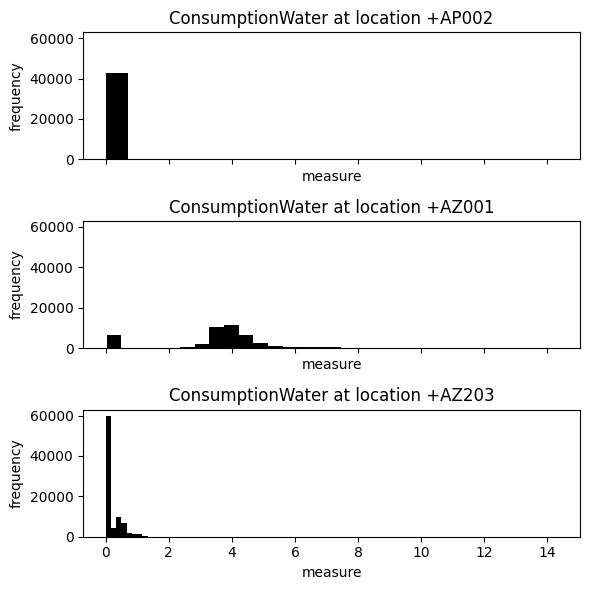

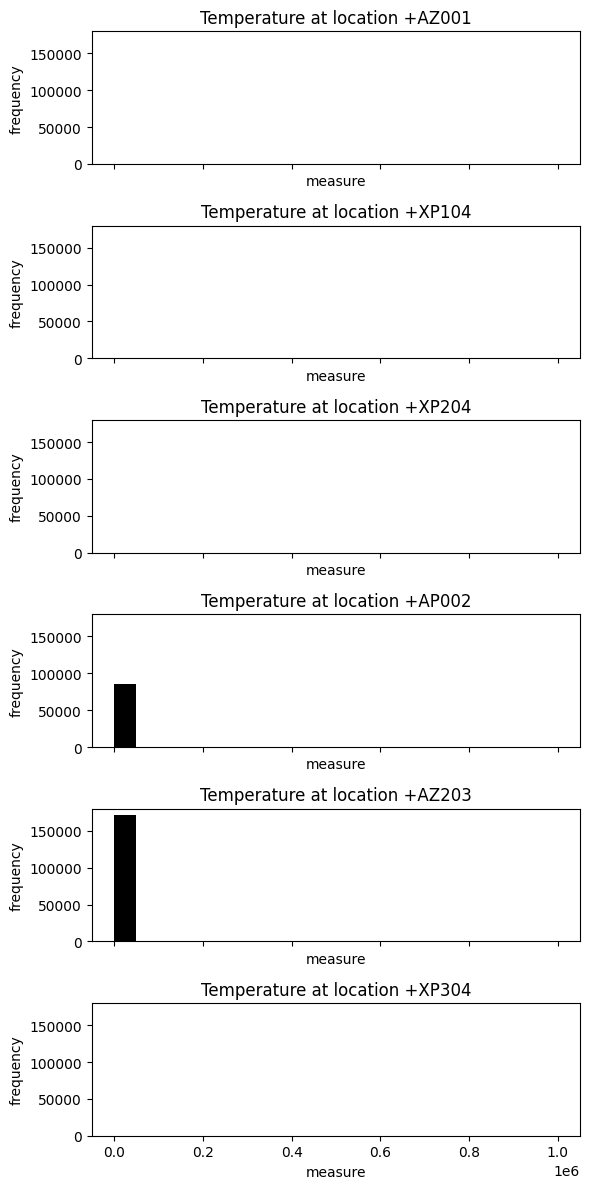

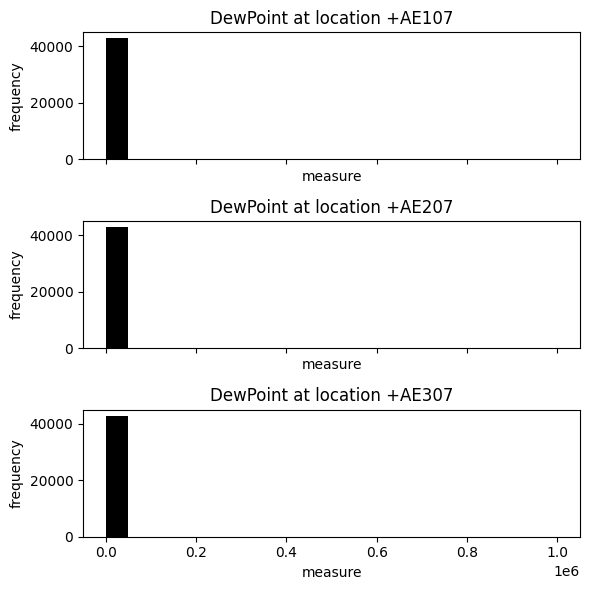

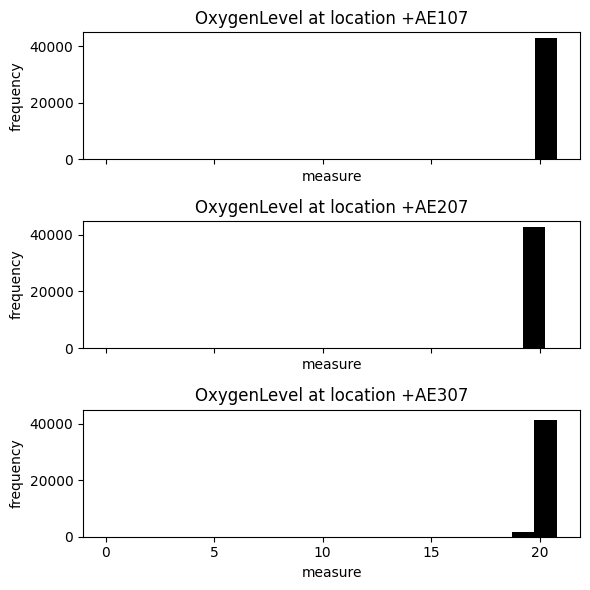

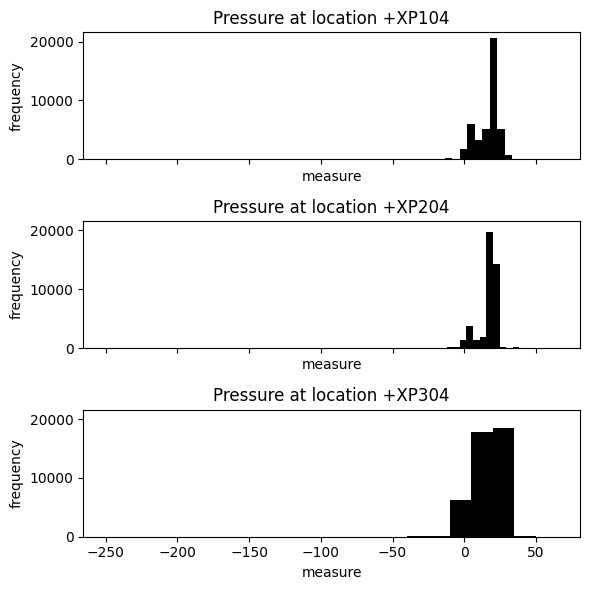

In [6]:
for channel in data.sensor_type.unique():
    _data = data.loc[data.sensor_type==channel]
    n = len(_data["installation_location"].unique())
    if n > 1:
        i = 0
        fig, ax = plt.subplots(ncols=1, nrows=n, figsize=(6,2*n), sharex=True, sharey=True)
        for location in _data["installation_location"].unique():
            try:
                __data = _data.loc[_data["installation_location"]==location]

                ax[i].hist(__data.measured_value, color="k", bins=20)
                ax[i].set_title(f"{channel} at location {location}")
                ax[i].set_ylabel("frequency")
                ax[i].set_xlabel("measure")

            except:
                continue
            i+=1
        plt.tight_layout()
        plt.savefig(f"img/Histogram_{channel}.png")
    else:
        continue

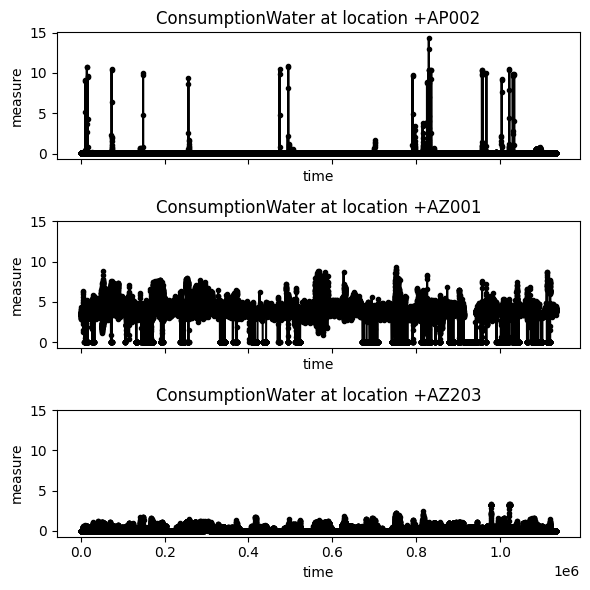

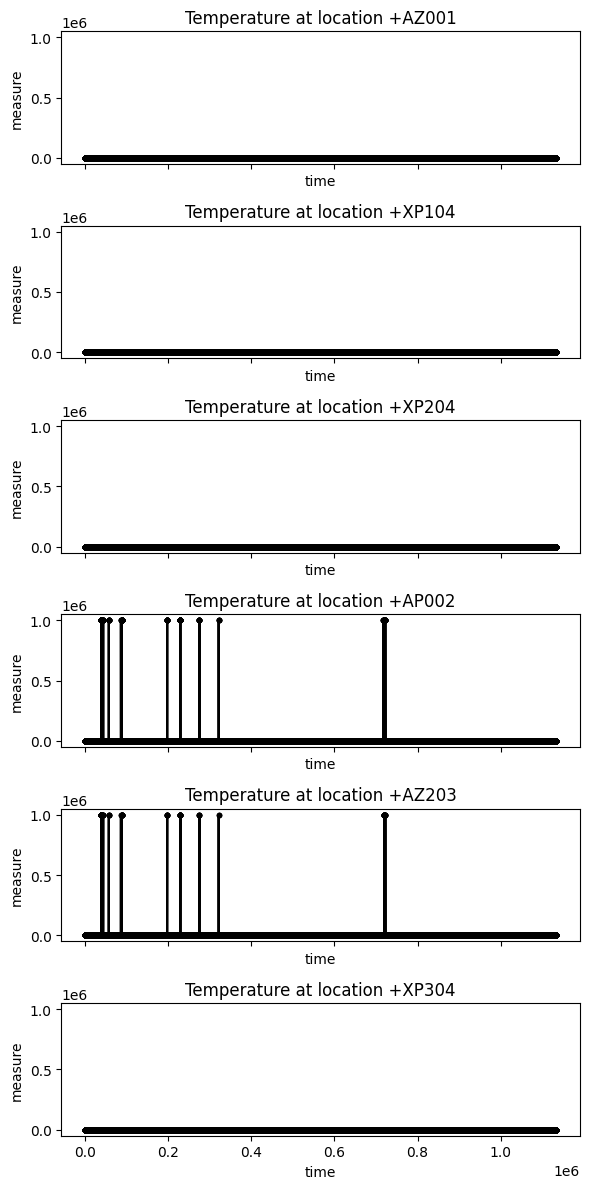

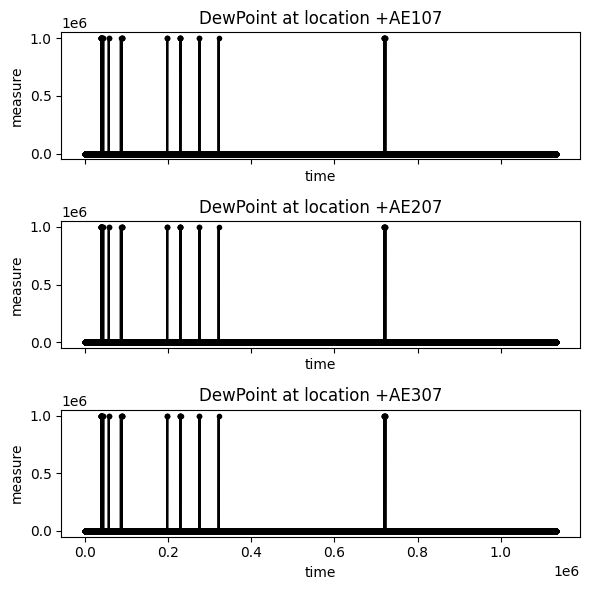

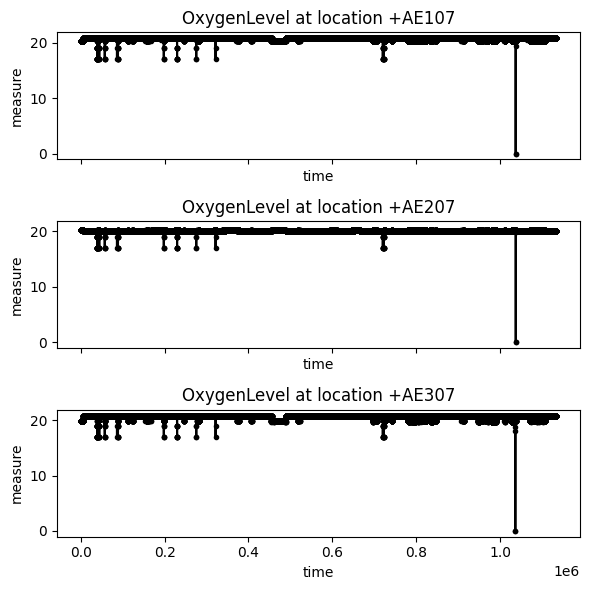

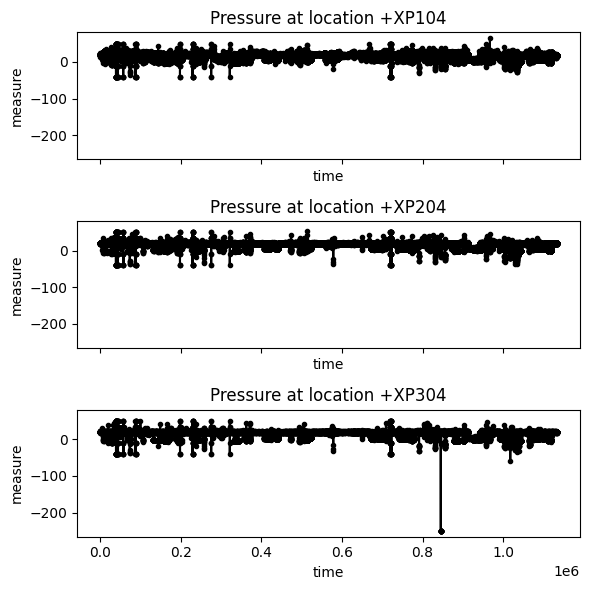

In [27]:
for channel in data.sensor_type.unique():
    _data = data.loc[data.sensor_type==channel]
    n = len(_data["installation_location"].unique())
    if n > 1:
        i = 0
        fig, ax = plt.subplots(ncols=1, nrows=n, figsize=(6,2*n), sharex=True, sharey=True)
        for location in _data["installation_location"].unique():
            try:
                __data = _data.loc[_data["installation_location"]==location]

                ax[i].plot(__data.measured_value, ".-", color="k", label=f"inst_loc={location}")
                ax[i].set_title(f"{channel} at location {location}")
                ax[i].set_ylabel("measure")
                ax[i].set_xlabel("time")

            except:
                continue
            i+=1
        plt.tight_layout()
        plt.savefig(f"img/Lineplot_{channel}.png")
    else:
        continue

## Scouting Locations

In [9]:
len(data)

1133744

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133744 entries, 0 to 1133743
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1133744 non-null  int64  
 1   trigger_ts_utc         1133744 non-null  object 
 2   measured_value         1133744 non-null  float64
 3   ns                     1133744 non-null  int64  
 4   machine                1133744 non-null  object 
 5   errection_location     1073265 non-null  object 
 6   installation_location  1073265 non-null  object 
 7   components             1073265 non-null  object 
 8   sensor_type            1133744 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 77.8+ MB


In [14]:
data["location_merge"] = data["errection_location"] + data["installation_location"]

In [16]:
data["location_merge"].unique()

array([nan, '++ST000+AP002', '++ST000+AZ001', '++ST000+CC001',
       '++ST060+AE107', '++ST060+XP104', '++ST070+AE207', '++ST070+AZ203',
       '++ST070+XP204', '++ST080+AE307', '++ST080+XP304'], dtype=object)

42785
42785
85570
86130
86130
43009
43009
171476
43009
42897
42897
42897
42897
42897
42897
43065
43065
43065


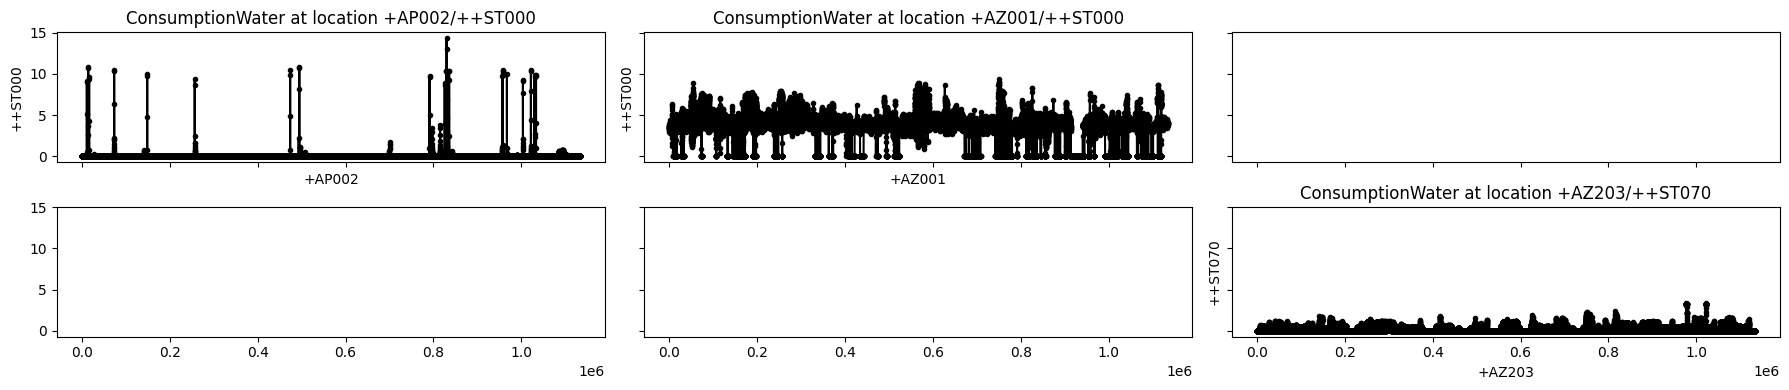

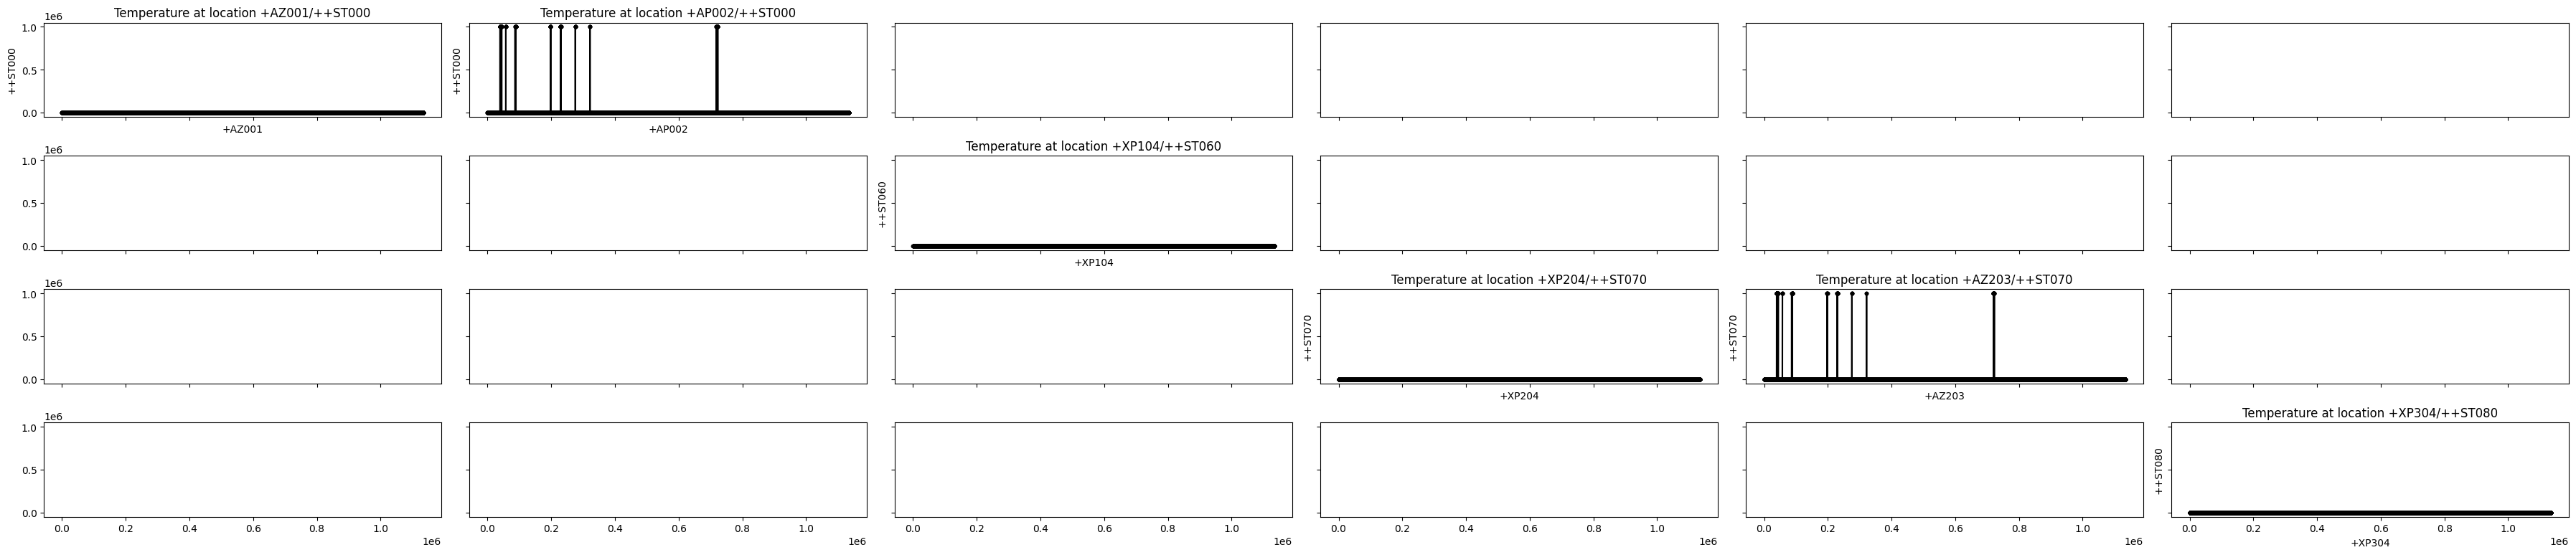

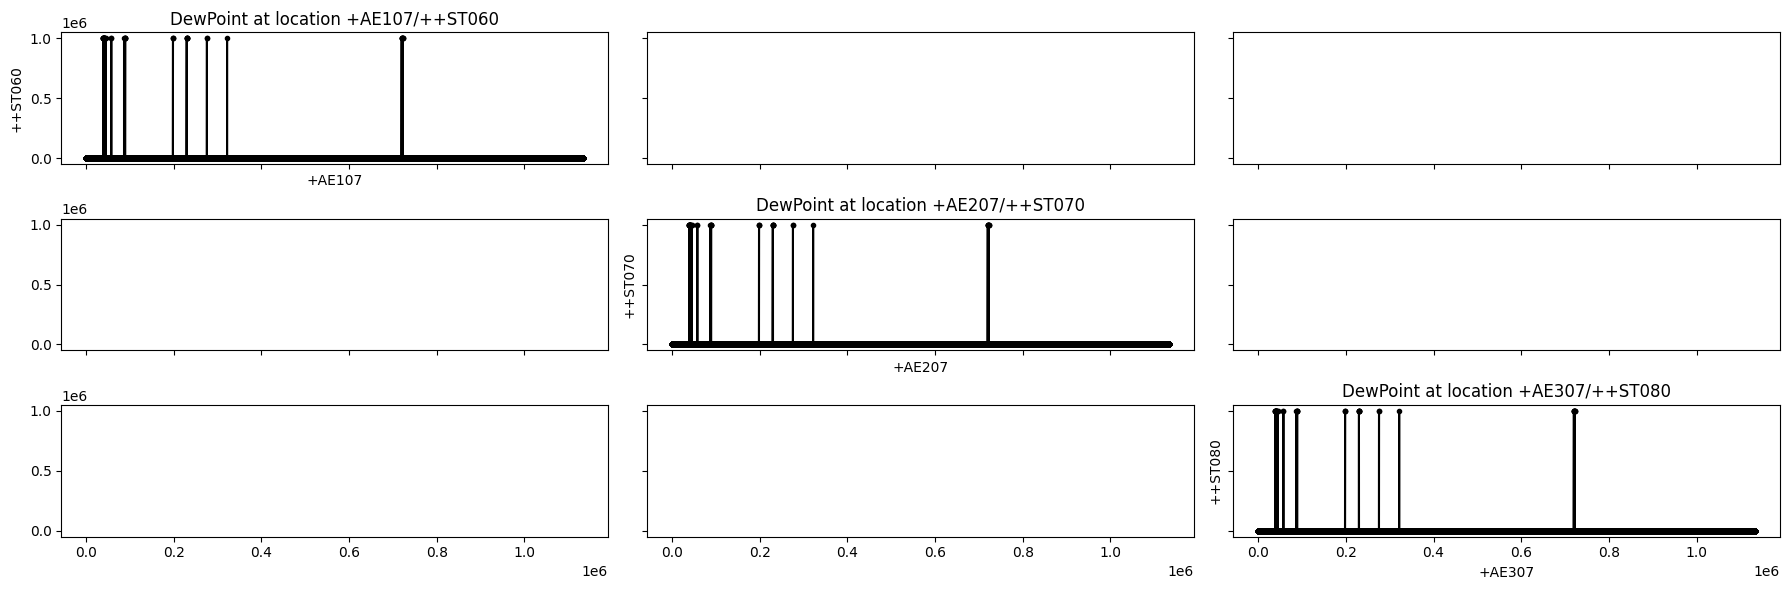

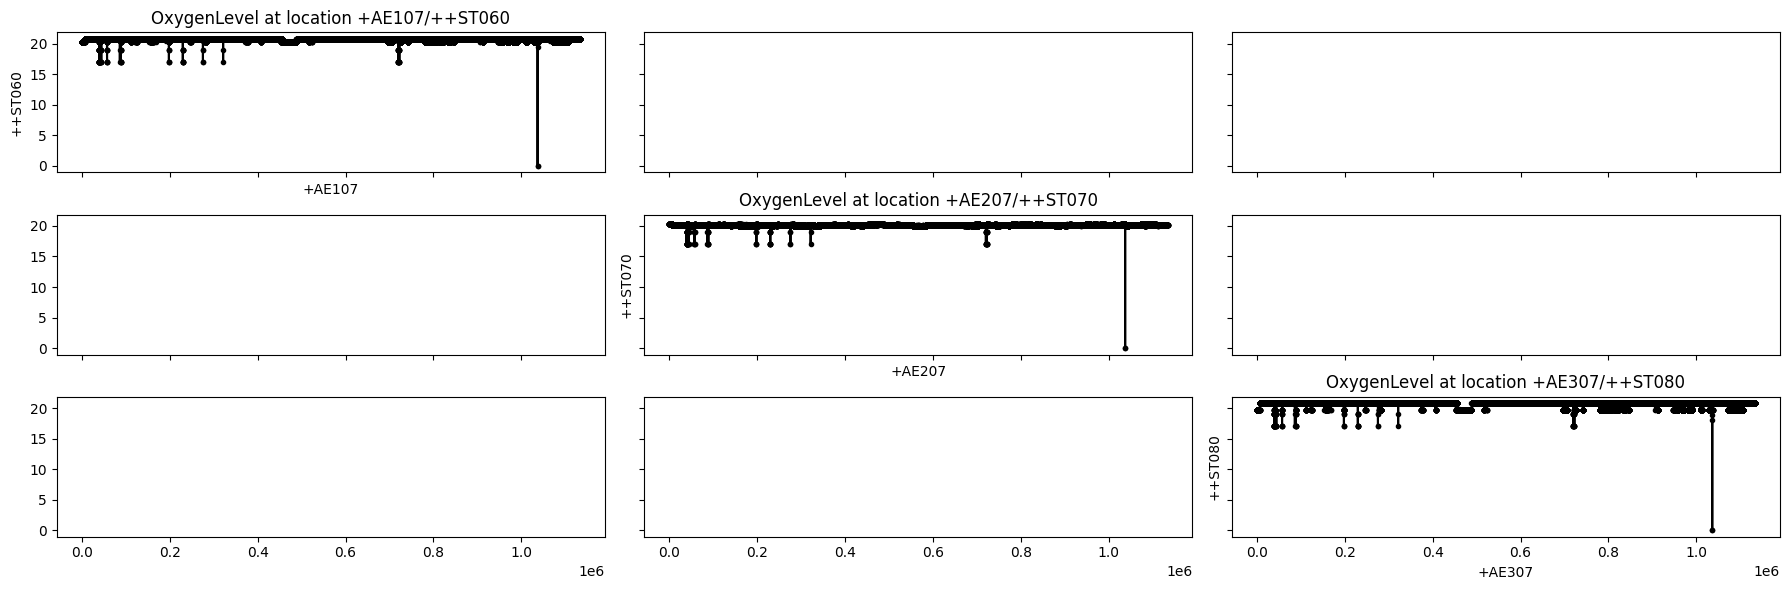

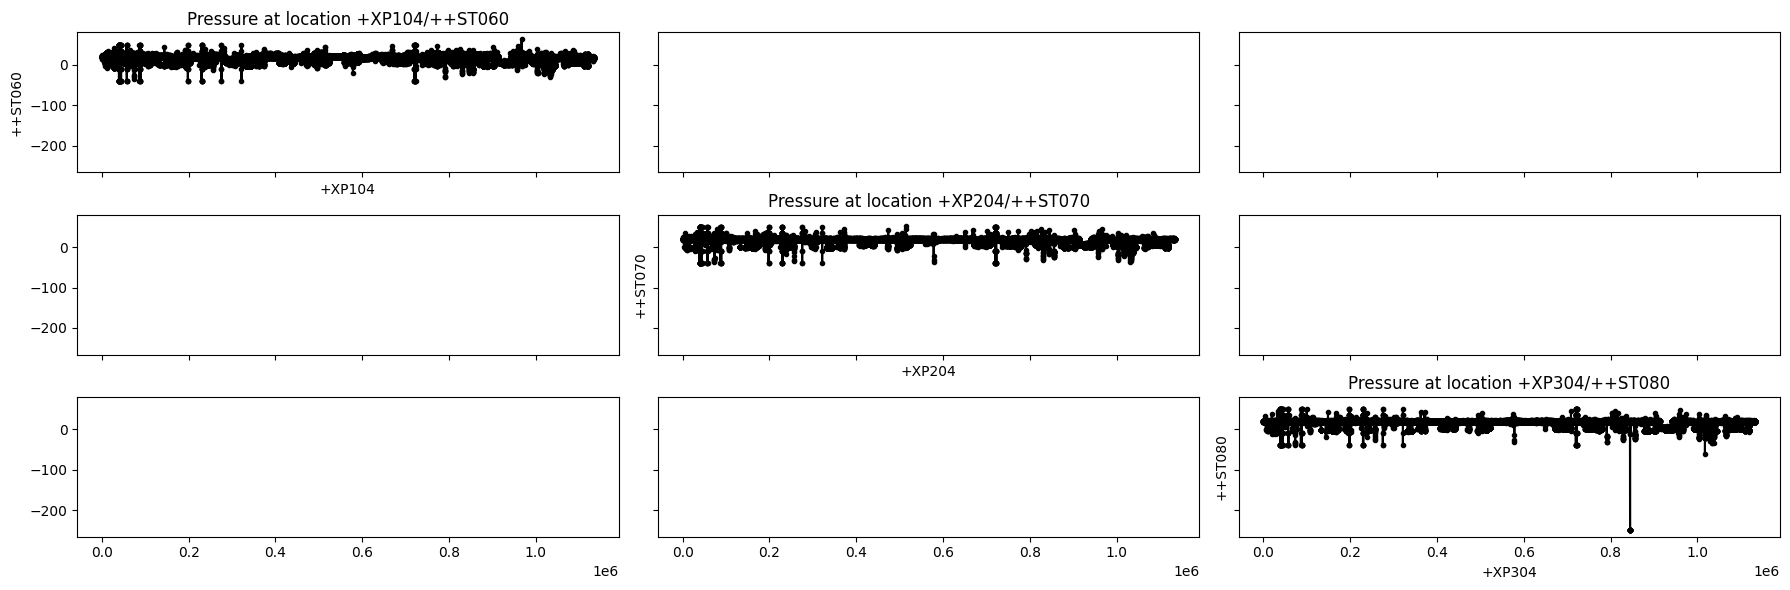

In [ ]:
for channel in data.sensor_type.unique():

    _data = data.loc[data.sensor_type==channel]
    rows = len(_data["errection_location"].unique())
    cols = len(_data["installation_location"].unique())

    # Check if its actually a log channel
    if rows > 1:

        r, c = 0, 0
        fig, ax = plt.subplots(ncols=cols, nrows=rows, figsize=(6*cols,2*rows), sharex=True, sharey=True)

        for e_loc in _data["errection_location"].unique():
            e_data = _data.loc[_data["errection_location"]==e_loc]

            for i_loc in e_data["installation_location"].unique():
                i_data = e_data.loc[e_data["installation_location"]==i_loc]

                if len(i_data.measured_value.values) > 0:
                    ax[r, c].plot(i_data.measured_value, ".-", color="k")
                    ax[r, c].set_title(f"{channel} at location {i_loc}/{e_loc}")
                    ax[r, c].set_ylabel(f"{e_loc}")
                    ax[r, c].set_xlabel(f"{i_loc}")
                else:
                    print("Test")
                    ax[r, c].axis("off")
                c += 1
            r += 1
        plt.tight_layout()
        plt.savefig(f"img/Lineplot_{channel}_with_2D_location.png")
    else:
        continue